In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# №1

In [10]:
df = pd.read_csv("Датасет CSV.csv", sep=';')
df.head()

,"Какой у вас телефон? (Айфон - 1, Андроид - 2)","Пол (М - 1, Ж - 2)",Количество братьев/сестёр (укажите цифру),"ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)",Среднее кол-во поездок на такси в месяц (укажите цифру),"Играете в мобильные игры? (Да -1, Нет - 2)","Область проживания ( в пределах садового - 1, ттк - 2, мцк - 3, мкад - 4, цкад - 5, московское большое кольцо - 6, дальше - 7","Важно ли качество камеры? (Да - 1, Нет - 2)",Из какого ФО вы приехали ( цифры в порядке расположения списка на картинке),"Чаще вы оплачиваете покупки... (картой - 1, стикером - 2, NFC - 3, наличными - 4, QR - 5)",...,"Ваше положение (безработный - 1, частная компания - 2, госкомпания - 3)","Пользуешься ли технологией умного дома? (Да - 1, Нет - 2)","Сфера работы IT? (Да - 1, Нет - 2)","Какие часы? (Нет часов - 1, Механические - 2, Электронные - 3)",Какой максимальный бюджет готов потратить? (Введи число без пробелов),Сколько раз в день заряжаешь телефон? (Введи цифру),"Каким браузером чаще пользуешься? (Google - 1, Яндекс - 2, Safari - 3, Opera - 4, Edge - 5, Firefox - 6)","Любите ли вы новые технологии? ( по шкале от 1 до 5, где 1 - вообще не люблю, 3 - спокойно отношусь, а 5 - обожаю)","Важна ли для вас возможность настройки интерфейса под себя? (Да - 1, Нет - 2)","Важно ли для вас качество материалов/материал корпуса? (Да -1, Нет - 2)"
0,1,1,1,1,20,1,5,1,1,1,...,2,2,2,2,120000,2,2,4,2,1
1,1,2,0,2,15,2,4,1,6,1,...,2,2,1,3,120000,1,3,3,2,1
2,1,1,2,1,1,2,4,1,1,1,...,3,1,1,3,100000,2,2,5,1,1
3,2,1,0,1,0,2,7,1,1,1,...,2,1,1,3,30000,1,1,5,1,1
4,1,1,0,1,0,2,4,1,1,1,...,3,2,1,3,90000,1,1,4,1,1


In [11]:
df.isna().sum()

,0
"Какой у вас телефон? (Айфон - 1, Андроид - 2)",0
"Пол (М - 1, Ж - 2)",0
Количество братьев/сестёр (укажите цифру),0
"ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)",0
Среднее кол-во поездок на такси в месяц (укажите цифру),0
"Играете в мобильные игры? (Да -1, Нет - 2)",0
"Область проживания ( в пределах садового - 1, ттк - 2, мцк - 3, мкад - 4, цкад - 5, московское большое кольцо - 6, дальше - 7",0
"Важно ли качество камеры? (Да - 1, Нет - 2)",0
Из какого ФО вы приехали ( цифры в порядке расположения списка на картинке),0
"Чаще вы оплачиваете покупки... (картой - 1, стикером - 2, NFC - 3, наличными - 4, QR - 5)",0


# №2

In [13]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

In [ ]:
df

,Age,Max_BPM,Resting_BPM,BMI
0,1.422343,0.010081,-0.303555,0.794278
1,0.600965,-0.076726,0.515749,1.064652
2,-0.548964,-1.118414,-1.122858,-0.030361
3,-1.123928,0.878155,-0.849757,-0.976669
4,-0.056137,0.704540,0.788850,-1.580503
...,...,...,...,...
968,-1.206066,0.617733,0.652299,0.579482
969,-1.123928,0.357311,-0.849757,0.116842
970,1.668756,1.225384,-1.259409,-0.812942
971,-0.548964,1.572614,-0.030454,1.926843


In [14]:
models = []
score1 = []
score2 = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init = 'k-means++').fit(df)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(df, model.labels_))

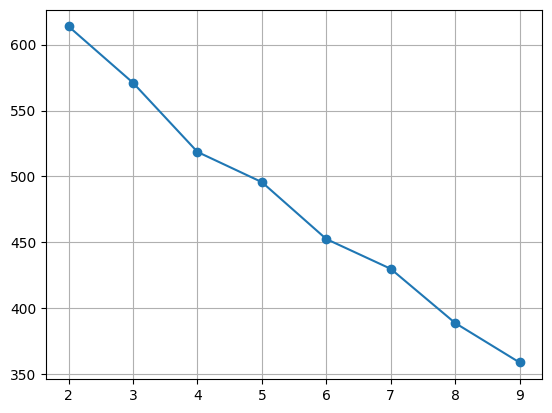

In [15]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker = 'o')
plt.show()

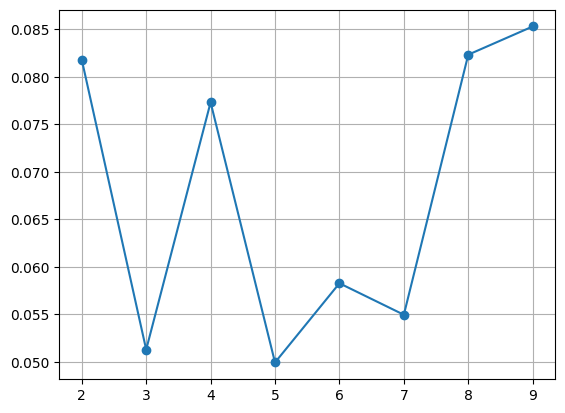

In [16]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = 'o')
plt.show()

Коэффициента силуэта достигает максимума при k = 7. Результат кластеризации данных для 7 кластеров:

In [17]:
model1 = KMeans(n_clusters=7, random_state=123, init = 'k-means++').fit(df)
model1.cluster_centers_

array([[ 0.46991277, -0.42257713,  0.25666303, -0.38760855,  0.22215141,
         0.5933661 , -0.40742742, -0.11539158, -0.43406608,  0.60104076,
        -1.25899727, -0.27560365,  0.42257713,  0.82495791,  0.18378676,
         0.47431874, -0.00705416, -0.63601844, -0.49672434,  1.32287566,
        -0.47140452],
       [-1.03077641,  0.97192739, -0.85779487,  0.12403473, -0.0319898 ,
         0.5933661 , -0.97553044, -0.65938047,  0.50831422, -0.56568542,
        -0.40235995,  0.66525018, -0.97192739,  0.1767767 ,  0.18378676,
         1.62102338, -0.47262859, -0.14022454, -0.49672434, -0.2362278 ,
        -0.47140452],
       [ 0.9701425 ,  0.13522468, -0.18912013,  0.94266398, -0.07108845,
        -0.91287093,  0.46366388, -0.22418936,  1.3753041 , -0.25455844,
         0.19728617, -0.46377441,  0.42257713,  0.04714045, -0.79815965,
        -0.47744611, -0.14672649,  0.520834  , -0.92433922, -0.34016803,
        -0.47140452],
       [-1.03077641, -0.42257713,  2.03979568,  0.12403473

In [18]:
labels = model1.labels_

In [19]:
df['Cluster'] = labels

Количество объектов в каждом кластере:

In [20]:
df['Cluster'].value_counts()

,count
Cluster,
6,9
2,5
5,5
1,4
0,4
3,4
4,2


In [23]:
fig = go.Figure(data=[go.Scatter3d(x=df['Какой у вас телефон?'], y=df['Пол'], z=df['Количество братьев/сестёр'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

KeyError: 'Какой у вас телефон?'

# №3
Иерархическая агломеративная кластеризация

In [24]:
model2 = AgglomerativeClustering(7, compute_distances=True)
clastering = model2.fit(df)
df['Cluster'] = clastering.labels_

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

# №4
DBSCAN (Density-based spatial clustering of applications with noise)

In [ ]:
df

,Age,Max_BPM,Resting_BPM,BMI,Cluster
0,1.422343,0.010081,-0.303555,0.794278,2
1,0.600965,-0.076726,0.515749,1.064652,0
2,-0.548964,-1.118414,-1.122858,-0.030361,6
3,-1.123928,0.878155,-0.849757,-0.976669,4
4,-0.056137,0.704540,0.788850,-1.580503,5
...,...,...,...,...,...
968,-1.206066,0.617733,0.652299,0.579482,3
969,-1.123928,0.357311,-0.849757,0.116842,4
970,1.668756,1.225384,-1.259409,-0.812942,2
971,-0.548964,1.572614,-0.030454,1.926843,0


In [ ]:
model3 = DBSCAN(eps=0.7, min_samples=10).fit(df)

In [ ]:
df['Cluster'] = np.array(model3.labels_)
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [ ]:
model4 = DBSCAN(eps=0.5, min_samples=8).fit(df)
df['Cluster'] = np.array(model4.labels_)

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [ ]:
model5 = DBSCAN(eps=0.7, min_samples=20).fit(df)
df['Cluster'] = np.array(model5.labels_)
fig = go.Figure(data=[go.Scatter3d(x=df['Age'], y=df['Max_BPM'], z=df['BMI'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

# Выводы:
При радиусе = 0,7 и порогу N по количеству точек в окрестности 10 DBSCAN выделил 9 кластеров.
При радиусе = 0,5 и порогу N по количеству точек в окрестности 8 DBSCAN выделил 7 кластеров.
При радиусе = 0,7 и порогу N по количеству точек в окрестности 20 DBSCAN выделил 2 кластера.
DBSCAN это один из самых эффективных алгоритмов кластеризации, но работает он достаточно долго.